# Classification and Regression Trees (CART)

## Trees and Rules

**Goal**: Classify or predict an outcome based on a set of predictors.  Results are a set of rules.

**Example**: 
- Goal:  classify a record as ***will accept credit card offer*** or ***will not accept***
- Rule might be: ***IF (Income >= 106) AND (Education < 1.5) AND (Family <= 2.5) THEN Class = 0 (nonacceptor)***
- Also called CART, Decision Trees, or just Trees
- Rules are represented by tree diagrams







In [1]:
%matplotlib inline
import matplotlib.pylab as plt

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from dmba import plotDecisionTree, classificationSummary, regressionSummary

## How is the Tree Produced?

- ***Recursive partitioning***: Repeatedly split the records into two parts so as to achieve maximum homogeneity(all features of same class) of outcome within each new part.
- ***Stopping Tree Growth***:  A fully grown tree is too complex and will overfit.


## Recursive Partitioning Steps

- Pick one of the predictor variables, xi
- Pick a value of xi, say si, that divides the training data into two (not necessarily equal) portions
- Measure how `pure` or `homogeneous` each of the resulting portions is.  `Pure` = containing records of mostly one class (or, for prediction, records with similar outcome values)
- Algorithm tries different values of xi, and si to maximize purity in the initial split.
- After you get a “maximum purity” split, repeat the process for a second split (on any variable), and so on.



## Riding Mowers - One Level

- Goal: Classify 24 households as owning or not owning riding mowers
- Predictors = Income, Lot Size

## How to Split?
- Order records according to one variable, say income
- Take a predictor value, say 59.7 (the first record) and divide records into those with income >= 59.7 and those income < 59.7
- Measure resulting purity (homogeneity) of class in each resulting portion
- Try all other split values
- Repeat for other variable(s)
- Select the one variable & split that yields the most purity

## Note on Categorical Variables
- Examine all possible ways in which the categories can be split.
- For example, categories A, B, C can be split three ways
1. {A} and {B, C}
2. {B} and {A, C}
3. {C} and {A, B}
- With many categories, # of splits becomes huge

In [2]:
mower_df = pd.read_csv('../datasets/RidingMowers.csv')


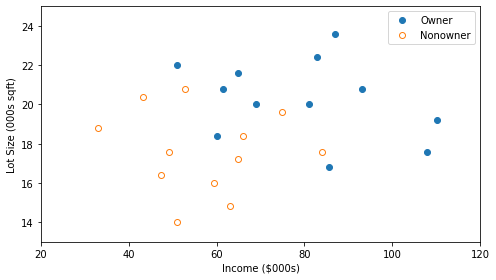

In [3]:
def basePlot(ax):
    mower_df.loc[mower_df.Ownership=='Owner'].plot(x='Income', y='Lot_Size', 
                                                   style='o', markerfacecolor='C0', markeredgecolor='C0', ax=ax)
    mower_df.loc[mower_df.Ownership=='Nonowner'].plot(x='Income', y='Lot_Size', 
                                                      style='o', markerfacecolor='none', markeredgecolor='C1', ax=ax)
    ax.legend(["Owner", "Nonowner"]);
    ax.set_xlim(20, 120)
    ax.set_ylim(13, 25)
    ax.set_xlabel('Income ($000s)')
    ax.set_ylabel('Lot Size (000s sqft)')
    return ax

fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
plt.tight_layout()
plt.show()

Classes: Nonowner, Owner


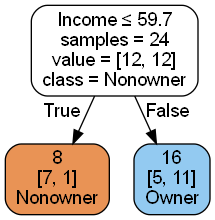

In [4]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=1)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

print(f"Classes: {', '.join(classTree.classes_)}")
plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

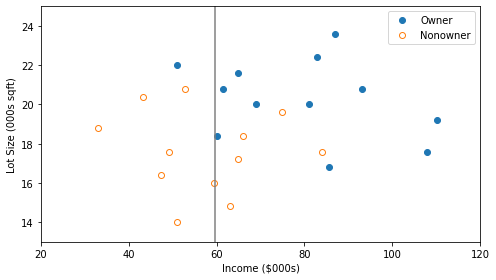

In [5]:
fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
x0 = 59.7
ax.plot((x0, x0), (25, 13), color='grey')
plt.tight_layout()
plt.show()

## Grow tree fully (multiple levels)

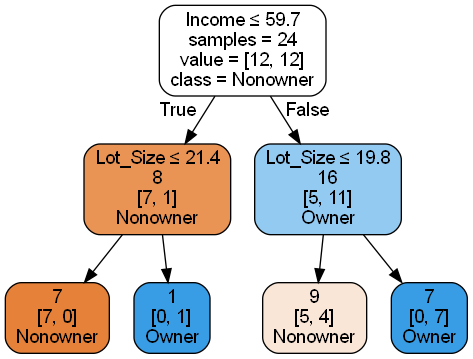

In [6]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=2)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

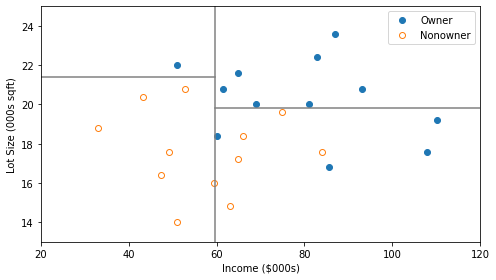

In [7]:
fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
x0 = 59.7
y1 = 21.4
y2 = 19.8
ax.plot((x0, x0), (25, 13), color='grey')
ax.plot((20, x0), (y1, y1), color='grey')
ax.plot((x0, 120), (y2, y2), color='grey')
plt.tight_layout()
plt.show()

Classes: Nonowner, Owner


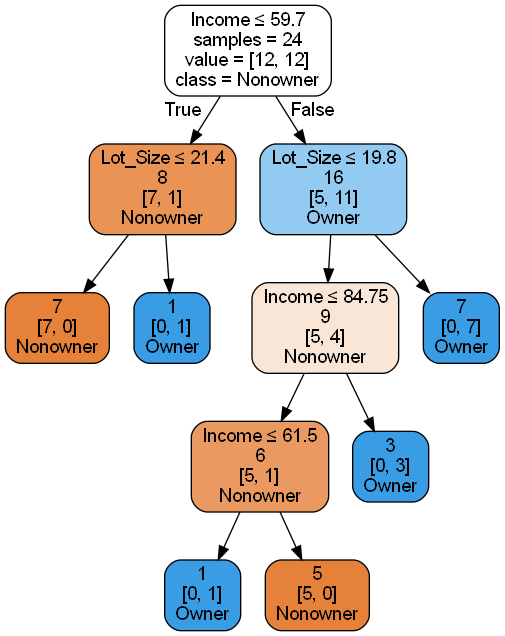

In [8]:
classTree = DecisionTreeClassifier(random_state=0)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

print(f"Classes: {', '.join(classTree.classes_)}")
plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

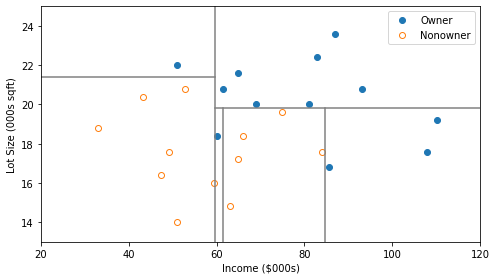

In [9]:
fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
x0 = 59.7
y1 = 21.4
y2 = 19.8
x3 = 84.75
x4 = 61.5
ax.plot((x0, x0), (25, 13), color='grey')
ax.plot((20, x0), (y1, y1), color='grey')
ax.plot((x0, 120), (y2, y2), color='grey')
ax.plot((x3, x3), (13, y2), color='grey')
ax.plot((x4, x4), (13, y2), color='grey')
plt.tight_layout()
plt.show()

## Measuring Impurity

Gini Index for a rectangle A -> $ I(A) = 1 - \Sigma^{m}_{k=1}  p_{k}^{2}  $

where: p = proportion of cases in rectangle A that belong to class k (out of m classes)

- I(A) = 0 when all cases belong to same class
- Max value when all classes are equally represented (= 0.50 in binary case)

## Impurity and Recursive Partitioning

- Obtain overall impurity measure (weighted average of individual rectangles)
- At each successive stage, compare this measure across all possible splits in all variables
- Choose the split that reduces impurity the most
- Chosen split points become nodes on the tree


## The Overfitting Problem

- Natural end of process is 100% purity in each leaf
- This overfits the data, which end up fitting noise in the data
- Universal Bank's loan acceptance with more records and more variables than the Riding Mower data – the full tree is very complex

## Trees can also be unstable

- If 2 or more variables are of roughly equal importance, which one CART chooses for the first split can depend on the initial partition into training and validation
- A different partition into training/validation could lead to a different initial split
- This can cascade down and produce a very different tree from the first training/validation partition
- Solution is to try many different training/validation splits – “cross validation”

## Univerisal Bank

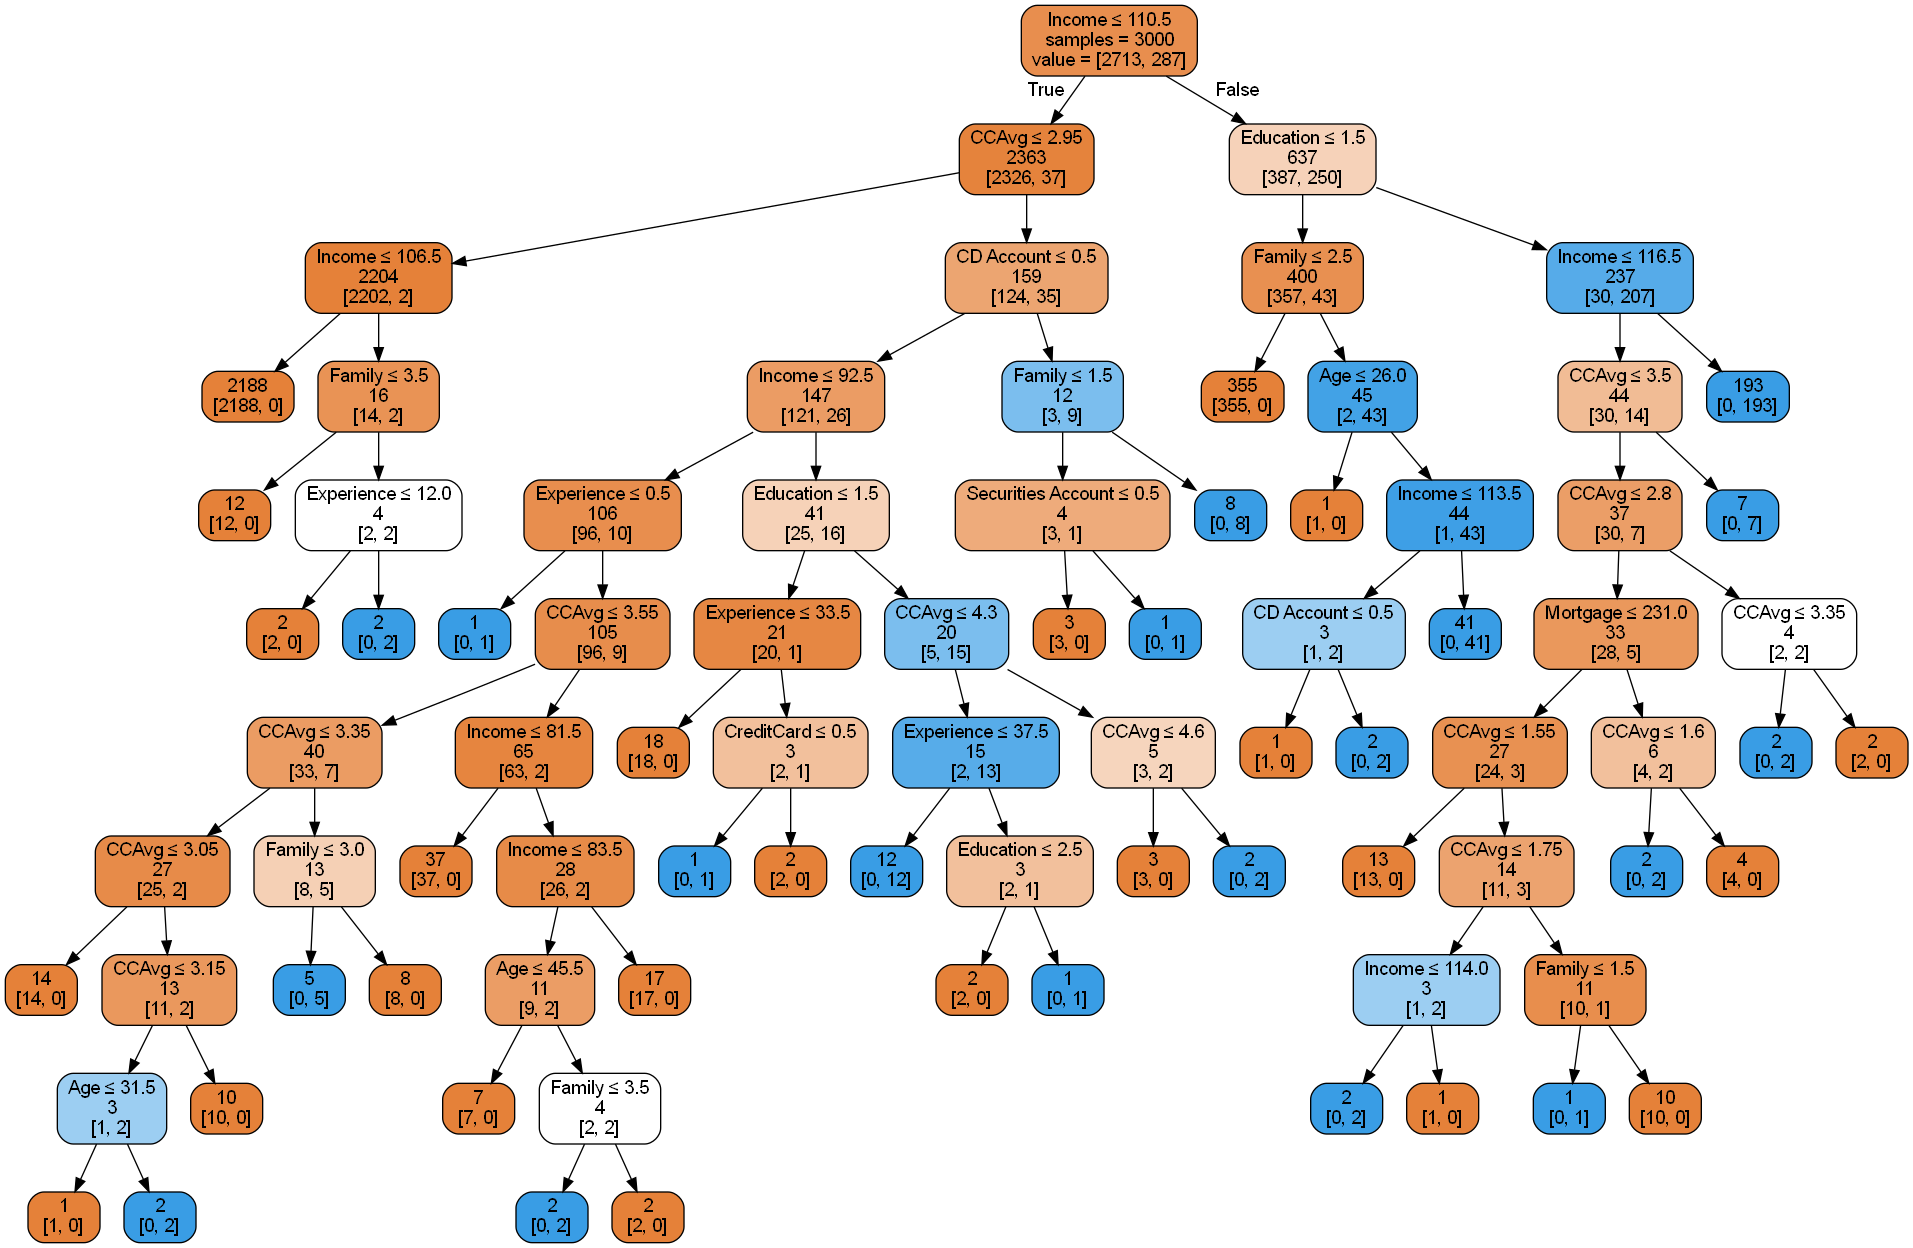

In [27]:
bank_df = pd.read_csv('../datasets/UniversalBank.csv')
bank_df = bank_df.drop(columns=['ID', 'ZIP Code'])

X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=train_X.columns)

In [11]:
classificationSummary(train_y, fullClassTree.predict(train_X))
print('\n')
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 2713    0
     1    0  287


Confusion Matrix (Accuracy 0.9790)

       Prediction
Actual    0    1
     0 1791   16
     1   26  167


## Full Tree with Cross Validation

In [12]:
# Five-fold cross-validation of the full decision tree classifier
treeClassifier = DecisionTreeClassifier()

scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

Accuracy scores of each fold:  ['0.985', '0.972', '0.993', '0.987', '0.992']
Accuracy: 0.986 (+/- 0.015)
Accuracy: 0.986 (+/- 0.008)


## Note the constraints

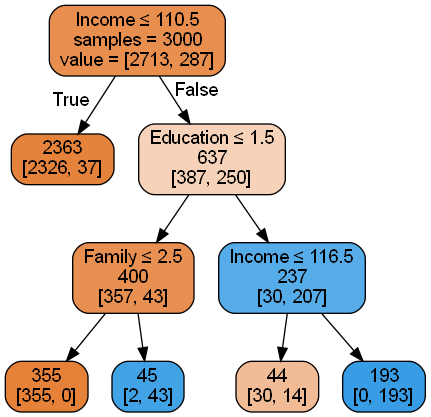

In [13]:
smallClassTree = DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01)
smallClassTree.fit(train_X, train_y)

plotDecisionTree(smallClassTree, feature_names=train_X.columns)

## Confusion Matrix

In [14]:
classificationSummary(train_y, smallClassTree.predict(train_X))
print('\n')
classificationSummary(valid_y, smallClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9823)

       Prediction
Actual    0    1
     0 2711    2
     1   51  236


Confusion Matrix (Accuracy 0.9770)

       Prediction
Actual    0    1
     0 1804    3
     1   43  150


## Grid search

In [15]:
# Start with an initial guess for parameters
param_grid = {'max_depth': [10, 20, 30, 40], 
              'min_samples_split': [20, 40, 60, 80, 100], 
              'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
             }
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

# Adapt grid based on result from initial grid search
param_grid = {'max_depth': list(range(2, 16)), 
              'min_samples_split': list(range(10, 22)), 
              'min_impurity_decrease': [0.0009, 0.001, 0.0011], 
             }
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Initial score:  0.9876666666666667
Initial parameters:  {'max_depth': 30, 'min_impurity_decrease': 0.0005, 'min_samples_split': 20}
Improved score:  0.9873333333333333
Improved parameters:  {'max_depth': 4, 'min_impurity_decrease': 0.0011, 'min_samples_split': 13}


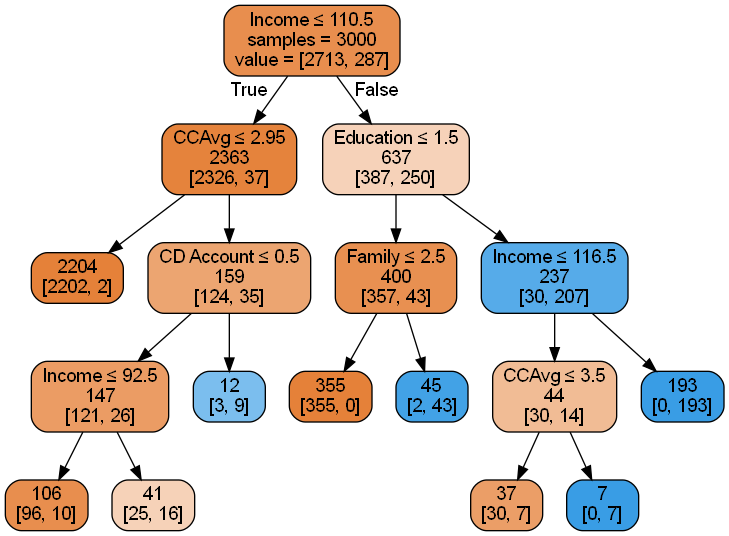

In [16]:
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

In [17]:
classificationSummary(train_y, bestClassTree.predict(train_X))
print('\n')
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9867)

       Prediction
Actual    0    1
     0 2708    5
     1   35  252


Confusion Matrix (Accuracy 0.9815)

       Prediction
Actual    0    1
     0 1801    6
     1   31  162


## Information about full decision tree

In [18]:
tree = fullClassTree
print('Number of nodes', tree.tree_.node_count)

Number of nodes 85


In [19]:
estimator = tree
# Using those arrays, we can parse the tree structure:

n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold
value = estimator.tree_.value

# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

from collections import Counter
nodeClassCounter = Counter()
terminal_leaves = 0
for i in range(n_nodes):
    if is_leaves[i]:
        terminal_leaves = terminal_leaves + 1
        nodeClassCounter.update([np.argmax(value[i][0])])
print()
print('Number of terminal leaves', terminal_leaves)
print(nodeClassCounter)


Number of terminal leaves 43
Counter({0: 24, 1: 19})


## Regression Trees

- Prediction is computed as the average of numerical target variable in the rectangle (in CT it is majority vote)
- Impurity measured by sum of squared deviations from leaf mean
- Performance measured by RMSE (root mean squared error)

## Ensemble Variants

- Random Forest
- Boosted Trees

## Random Forests

- Draw multiple random samples from data ("bootstrap resampling")
- Fit tree to each resample using a random set of predictors
- Combine the classifications/predictions from all the resampled trees (the "forest") to obtain improved predictions
- Basic idea:  Taking an average of multiple estimates (models) is more reliable than just using a single estimate

## Boosted Trees

- Fits a succession of single trees
- Each successive fit up-weights the misclassified records from prior stage
- You now have a set of classifications or predictions, one from each tree
- Use weighted voting for classification, weighted average for prediction, higher weights to later trees


## Toyota Corolla Prices

In [28]:
toyotaCorolla_df = pd.read_csv('../datasets/ToyotaCorolla.csv').iloc[:1000,:]
toyotaCorolla_df = toyotaCorolla_df.rename(columns={'Age_08_04': 'Age', 'Quarterly_Tax': 'Tax'})

predictors = ['Age', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'CC', 'Doors', 'Tax', 'Weight']
outcome = 'Price'

X = pd.get_dummies(toyotaCorolla_df[predictors], drop_first=True)
y = toyotaCorolla_df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# user grid search to find optimized tree
param_grid = {'max_depth': [5, 10, 15, 20, 25], 
              'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
              'min_samples_split': [10, 20, 30, 40, 50], 
             }
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)

param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
              'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
              'min_samples_split': [14, 15, 16, 18, 20, ], 
             }
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

regTree = gridSearch.best_estimator_

Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 20}
Improved parameters:  {'max_depth': 6, 'min_impurity_decrease': 0, 'min_samples_split': 16}


In [29]:
regressionSummary(train_y, regTree.predict(train_X))
regressionSummary(valid_y, regTree.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1058.8202
            Mean Absolute Error (MAE) : 767.7203
          Mean Percentage Error (MPE) : -0.8074
Mean Absolute Percentage Error (MAPE) : 6.8325

Regression statistics

                      Mean Error (ME) : 60.5241
       Root Mean Squared Error (RMSE) : 1554.9146
            Mean Absolute Error (MAE) : 1026.3487
          Mean Percentage Error (MPE) : -1.3082
Mean Absolute Percentage Error (MAPE) : 9.2311


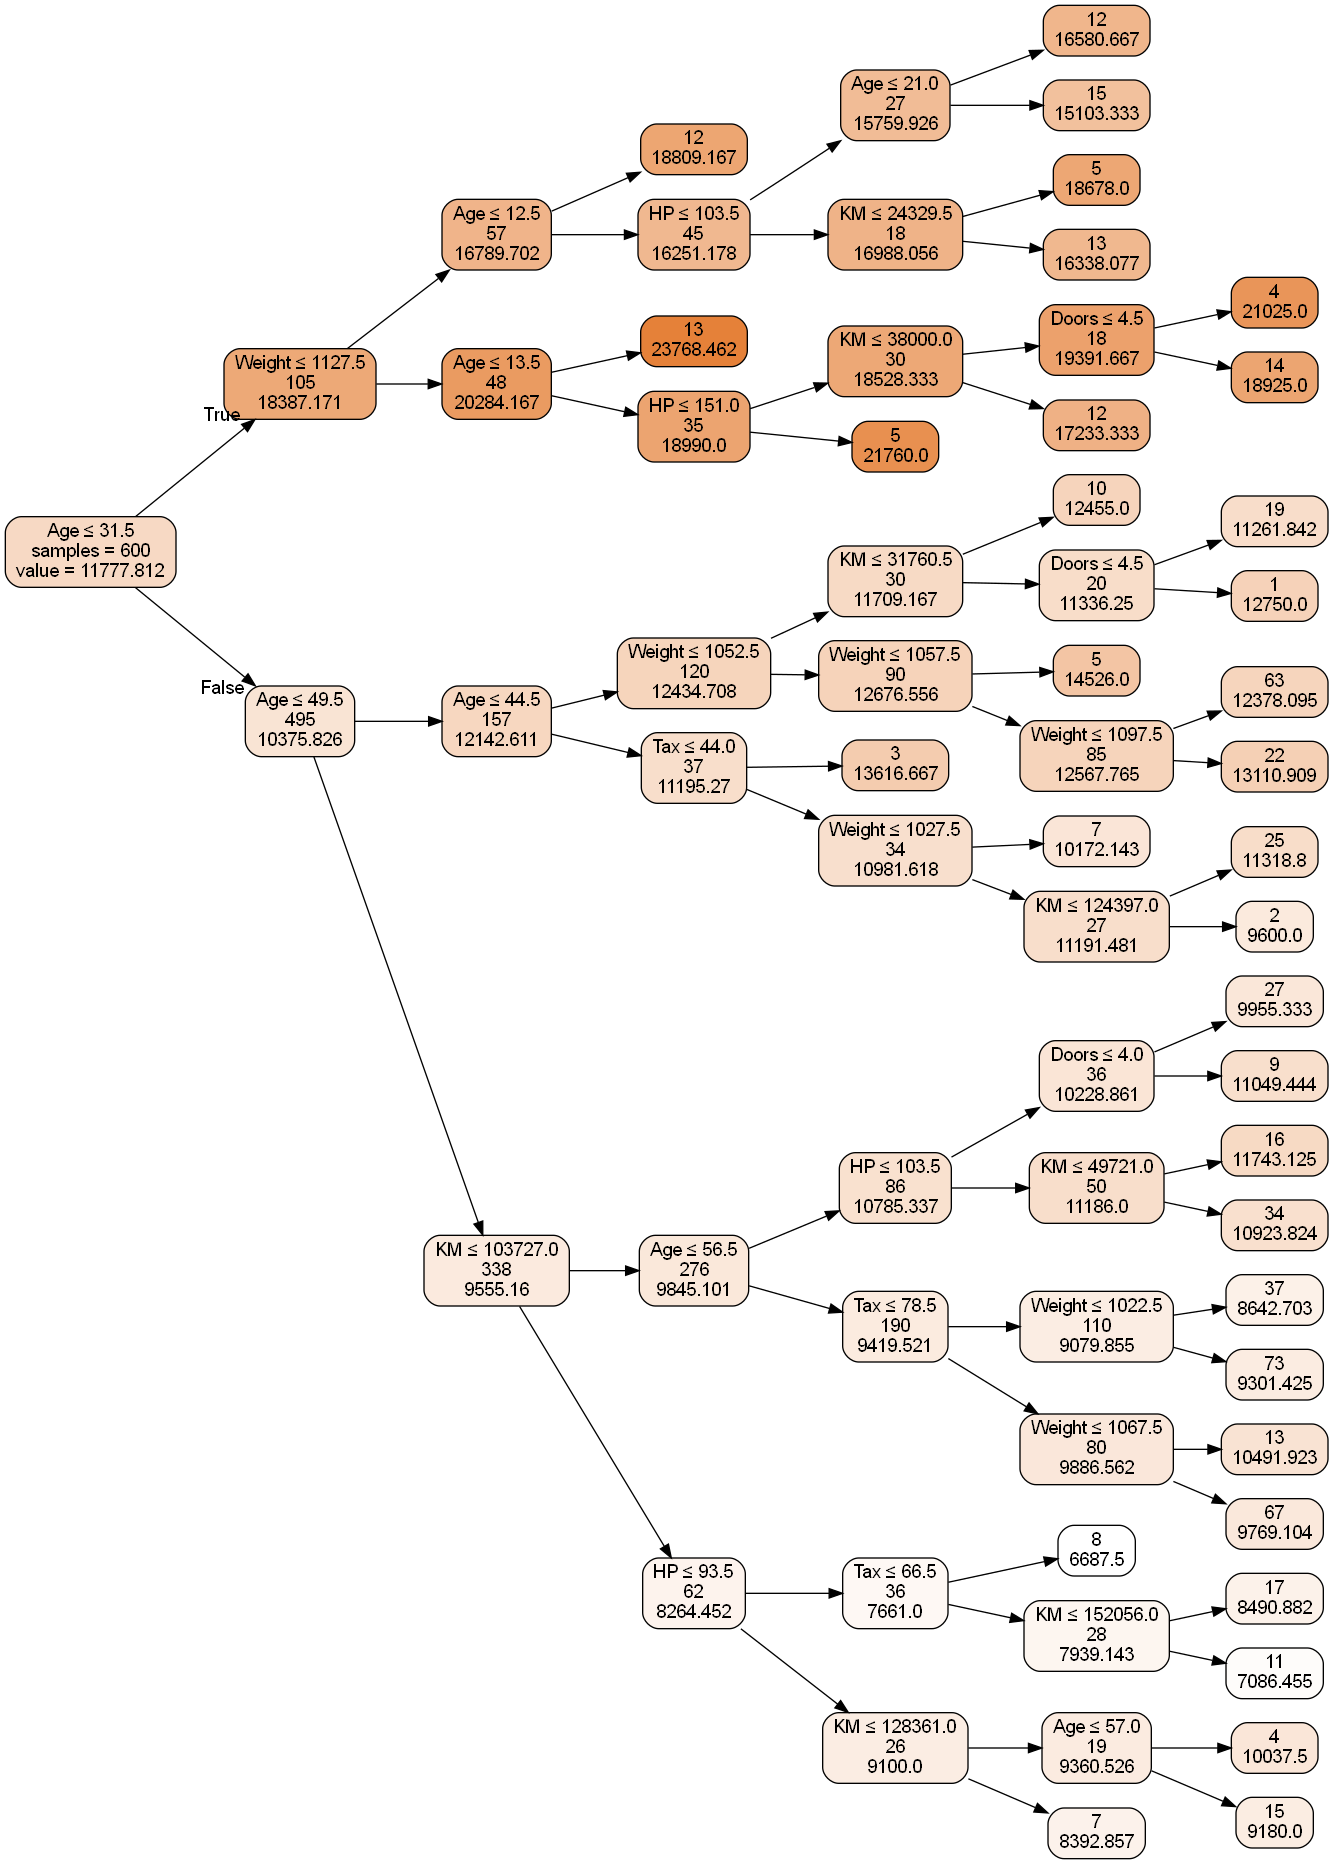

In [30]:
plotDecisionTree(regTree, feature_names=train_X.columns)
plotDecisionTree(regTree, feature_names=train_X.columns, rotate=True)

## Variable importance plot

- Each variable is used by some trees and not others
- We can, therefore, measure each variable’s contribution to reducing impurity (reduction in Gini Index)
- This is the variable importance score

In [31]:
bank_df = pd.read_csv('../datasets/UniversalBank.csv')
bank_df = bank_df.drop(columns=['ID', 'ZIP Code'])

X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

               feature  importance       std
7   Securities Account    0.003964  0.004998
9               Online    0.006394  0.005350
10          CreditCard    0.007678  0.007053
6             Mortgage    0.034243  0.023469
1           Experience    0.035539  0.016061
0                  Age    0.036258  0.015858
8           CD Account    0.057917  0.043185
3               Family    0.111375  0.053146
4                CCAvg    0.172105  0.103011
5            Education    0.200772  0.101002
2               Income    0.333756  0.129227


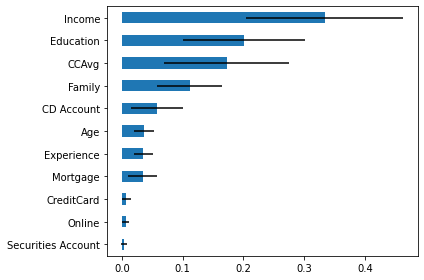

In [32]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

## Confusion matrix and metrics

In [35]:
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 0.9820)

       Prediction
Actual    0    1
     0 1803    4
     1   32  161


## Boosted Trees

- Especially useful for the "rare case" scenario (suppose 1’s are the rare class)
- With simple classifiers, it can be hard for a "1" to "break out" from the dominant classification, & many get misclassified
- Up-weighting them focuses the tree fitting on the 1’s, and reduces the dominating effect of the 0’s

In [36]:
boost = GradientBoostingClassifier()
boost.fit(train_X, train_y)
classificationSummary(valid_y, boost.predict(valid_X))

Confusion Matrix (Accuracy 0.9835)

       Prediction
Actual    0    1
     0 1799    8
     1   25  168


## Cart - Advantage
Easy to understand
single trees produce rules that are easy to interpret and implement
variable selection and reduction is automatic
do not require the assumption of statistical models
can work without extensive handling of missing data 
disadvatage of single trees
instability and poor predictive performance